# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [22]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
customers.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [21]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0

<Figure size 576x576 with 0 Axes>

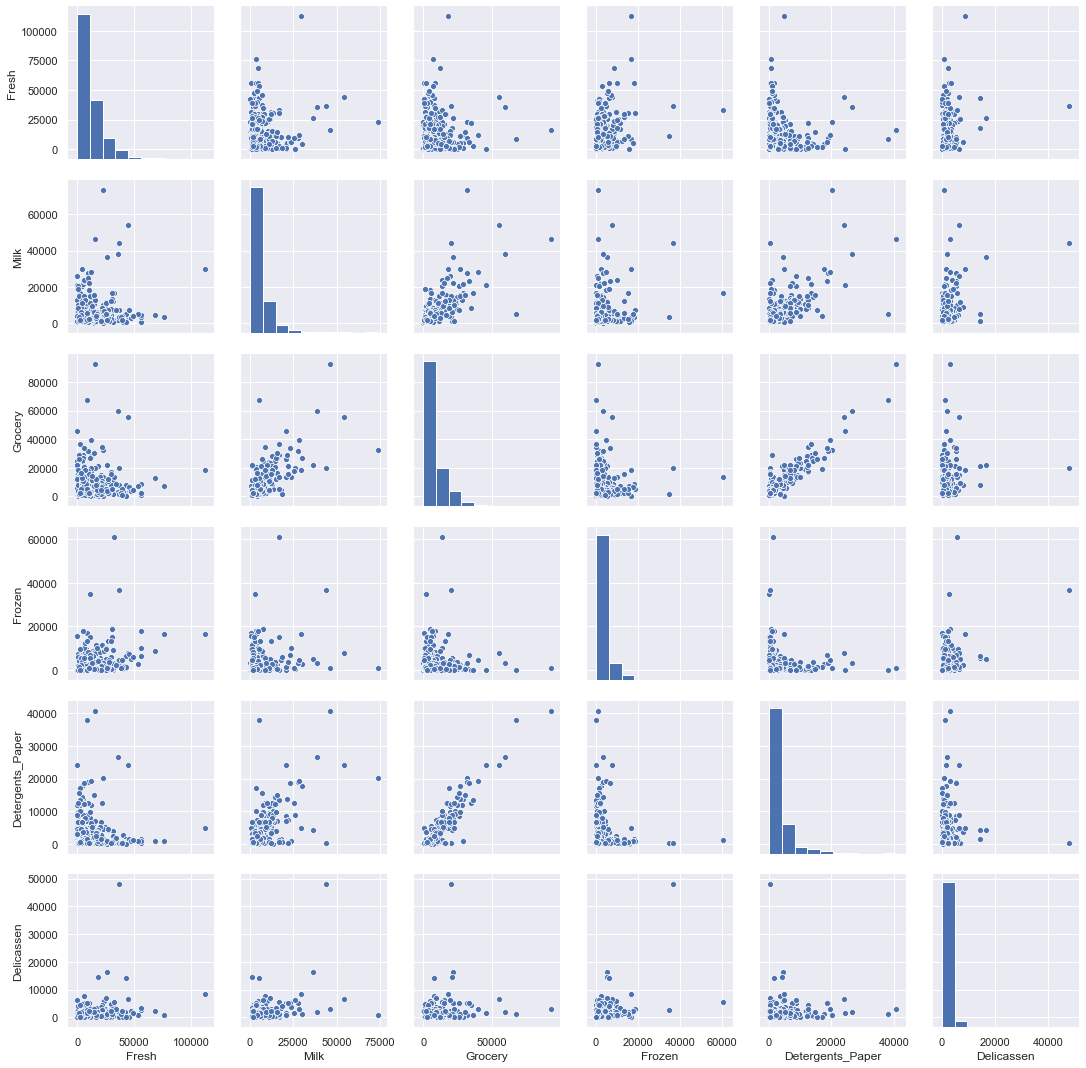

In [23]:
# Your code here:
def dataframe_analysis(dataframe):
    print(dataframe.dtypes)
    print(dataframe.isnull().sum())
    print(dataframe.corr())

def pareto(df,column):
    df = df.sort_values(by=column,ascending=False)
    df["cumpercentage"] = df[column].cumsum()/df[column].sum()*100

    return df["cumpercentage"].head(10)

def matriz(dataframe, features):
    plt.figure(figsize=(8,8))
    sns.pairplot(dataframe, vars=list(features));

dataframe_analysis(customers)
pareto(customers,'Channel')
matriz(customers,('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'))

# Your observations here
Observamos un dataframe lim

In [0]:
Observamos un dataset limpio con zero valores nulos, observamos algunas correlaciones muy altas > .90, también se observa que los datos de cada uno de las características que no tienen una distribución normal

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [24]:
# Your code here
def dataframe_transform(data):
    dataframe=data.transform(func = ['sqrt'])
    dataframe_2=dataframe.skew()
    return dataframe_2
    # La normalizamos mediante una función cudrática

customers_2=dataframe_transform(customers)

In [0]:
# Your comment here


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [25]:
# Your import here:
from sklearn.preprocessing import StandardScaler
customers_standard= StandardScaler().fit_transform(customers)
customers_standard
# Your code here:



array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [56]:
# Your code here:
from sklearn.cluster import KMeans

def clustering(dataframe):
    return KMeans(n_clusters=3).fit(customers_standard)

customers["etiquetas_KMeans"] = clustering(customers_standard).labels_
customers.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,etiquetas,etiquetas_DBSCAN,etiquetas_KMeans
0,2,3,12669,9656,7561,214,2674,1338,0,-1,2
1,2,3,7057,9810,9568,1762,3293,1776,0,-1,2
2,2,3,6353,8808,7684,2405,3516,7844,0,-1,2


Count the values in `labels`.

In [57]:
# Your code here:
customers['etiquetas_KMeans'].value_counts()

0    297
2    130
1     13
Name: etiquetas_KMeans, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [28]:
# Your code here
from sklearn.cluster import DBSCAN

def dbscan_model(dataframe):
    dbscan_model = DBSCAN(eps=0.5)
    return dbscan_model.fit(customers_standard)

customers["etiquetas_DBSCAN"] = dbscan_model(customers_standard).labels_
customers['etiquetas_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: etiquetas_DBSCAN, dtype: int64

Count the values in `labels_DBSCAN`.

In [0]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

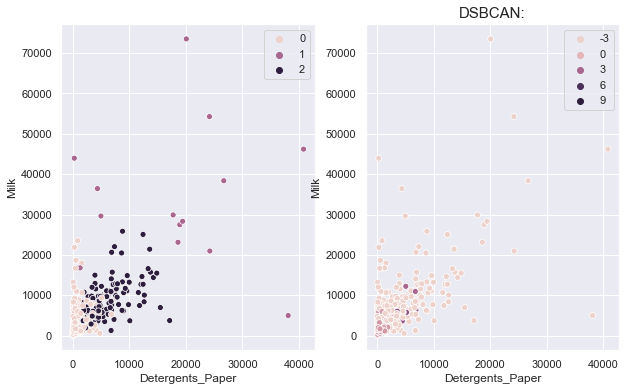

In [58]:
# Your code here:

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.title("KMeans", fontsize=15)
sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue = clustering(customers_standard).labels_, ax=ax1);

plt.title("DSBCAN:", fontsize=15)
sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue = dbscan_model(customers_standard).labels_,ax=ax2);


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

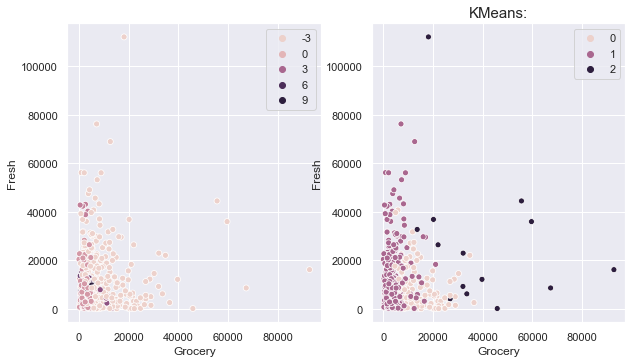

In [51]:
# Your code here:
fig = plt.figure(figsize=(10,5.5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.title("DSBCAN:", fontsize=15)
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue = dbscan_model(customers_standard).labels_,ax=ax1);

plt.title("KMeans:", fontsize=15)
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue = clustering(customers_standard).labels_,ax=ax2);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

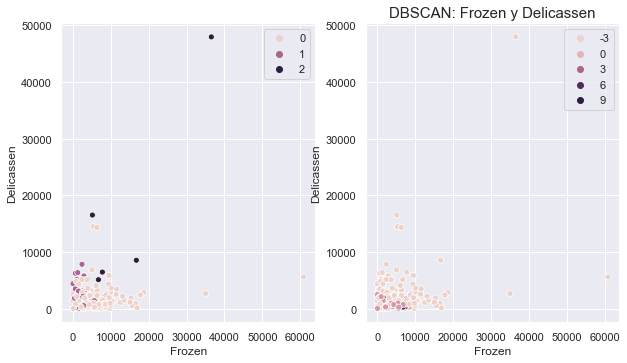

In [52]:
# Your code here:
fig = plt.figure(figsize=(10,5.5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.title("KMeans: Frozen y Delicassen", fontsize=15)
sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue = clustering(customers_standard).labels_, ax=ax1);

plt.title("DBSCAN: Frozen y Delicassen", fontsize=15)
sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue = dbscan_model(customers_standard).labels_, ax=ax2);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [60]:
# Your code here:
customers.groupby("etiquetas_KMeans").mean() , customers.groupby("etiquetas_DBSCAN").mean()

(                   Channel    Region         Fresh          Milk  \
 etiquetas_KMeans                                                   
 0                 1.003367  2.505051  13075.898990   3218.737374   
 1                 1.846154  2.615385  25770.769231  35160.384615   
 2                 2.000000  2.623077   8165.915385   8748.515385   
 
                        Grocery       Frozen  Detergents_Paper   Delicassen  \
 etiquetas_KMeans                                                             
 0                  3855.696970  3620.400673        776.875421  1242.249158   
 1                 41977.384615  6844.538462      19867.384615  7880.307692   
 2                 13905.492308  1441.630769       5991.146154  1535.007692   
 
                   etiquetas  etiquetas_DBSCAN  
 etiquetas_KMeans                               
 0                  1.003367          0.646465  
 1                  2.000000         -1.000000  
 2                  0.000000         -0.538462  ,
          

Which algorithm appears to perform better?

In [54]:
# Your observations here
#KMeans

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,etiquetas,etiquetas_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,0,-1
5,2,3,9413,8259,5126,666,1795,1451,0,-1
6,2,3,12126,3199,6975,480,3140,545,0,0
7,2,3,7579,4956,9426,1669,3321,2566,0,-1
8,1,3,5963,3648,6192,425,1716,750,1,1
9,2,3,6006,11093,18881,1159,7425,2098,0,-1


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [0]:
# Your code here

In [0]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [0]:
# Your code here

In [0]:
# Your comment here